数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
genres = list(np.load('genres.npy'))
genres

['Animation',
 'History',
 'Fantasy',
 'Crime',
 'Comedy',
 'TV Movie',
 'Western',
 'Family',
 'Action',
 'War',
 'Mystery',
 'Music',
 'Adventure',
 'Drama',
 'Foreign',
 'Thriller',
 'Horror',
 'Science Fiction',
 'Documentary',
 'Romance']

In [48]:
all_data = pd.read_csv('user_actor_movie.csv')  # 读取数据

In [49]:
all_data

,userId,movieId,rating,timestamp,Animation,History,Fantasy,Crime,Comedy,TV Movie,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,2,339,5.0,867041296,0.00,3.500000,3.250000,3.000000,2.250000,0.00,...,0,0,0,0,0,0,0,0,1,0
1,6335,339,4.0,1437329350,3.50,3.000000,3.642857,3.583333,3.177419,5.00,...,0,0,0,0,0,0,0,0,1,0
2,7816,339,4.0,828021097,0.00,4.000000,3.666667,3.666667,3.600000,0.00,...,0,0,0,0,0,0,0,0,1,0
3,9487,339,4.0,1346099371,0.00,2.250000,3.100000,3.000000,3.444444,4.00,...,0,0,0,0,0,0,0,0,1,0
4,10382,339,3.0,829932637,0.00,3.666667,3.666667,3.409091,3.814815,0.00,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,16072,8810,4.0,1276023730,0.00,0.000000,0.000000,0.000000,0.000000,0.00,...,1,0,0,0,0,0,0,0,0,0
4399,16087,1913,2.0,1153238131,4.00,3.416667,3.285714,3.357143,3.217742,4.25,...,0,0,0,0,0,0,0,0,0,1
4400,16122,3427,4.0,994635235,5.00,5.000000,4.666667,4.200000,4.750000,0.00,...,0,1,0,0,0,0,0,0,0,0
4401,16146,2593,5.0,840401950,3.00,0.000000,4.333333,3.500000,3.800000,0.00,...,0,0,0,0,0,0,0,0,1,0


In [50]:
from sklearn.model_selection import train_test_split
X = all_data[genres]
y = all_data['rating']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=980)

In [51]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train).reshape(len(y_train),1)
y_test=np.array(y_test).reshape(len(y_test),1)

In [52]:
x_train.shape

(3082, 20)

In [53]:
# 每个批次的大小
n_train = x_train.shape[0]
p_train = x_train.shape[1]
n_test = x_test.shape[0]
p_test = x_test.shape[1]
batch_size = 10
# 计算一共有多少个批次
n_batch =n_train // batch_size

In [54]:
import tensorflow as tf

In [55]:
print(tf.__path__) #在tf2下使用了tf1的API
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

['D:\\Program Files (x86)\\Anaconda\\envs\\tensorflow\\lib\\site-packages\\tensorflow']


In [56]:
#创建一个神经网络层
def add_layer(input,in_size,out_size,activation_function=None):
    """
    :param input: 数据输入
    :param in_size: 输入大小
    :param out_size: 输出大小
    :param activation_function: 激活函数（默认没有）
    :return:output：数据输出
    
    """
    Weight=tf.Variable(tf.random_normal([in_size,out_size]) )
    biases=tf.Variable(tf.zeros([1,out_size]) +0.1 )
    W_mul_x_plus_b=tf.matmul(input,Weight) + biases
    #根据是否有激活函数
    if activation_function == None:
        output=W_mul_x_plus_b
    else:
        output=activation_function(W_mul_x_plus_b)
    return output

In [57]:
# 输入维度
p_train = 20

In [58]:
# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,p_train])
y = tf.placeholder(tf.float32,[None,1])
# # 创建一个简单的神经网络
# W1 = tf.Variable(tf.ones([p_train,1]))
# b1 = tf.Variable(tf.ones([1]))
# prediction = tf.nn.relu(tf.matmul(x,W1)+b1)
# # 创建一个包含10个神经元节点数的隐含层

In [59]:
#定义第一个隐藏层
# 激活函数为sigmoid
hidden_layer1=add_layer(x,20,10,activation_function=tf.nn.sigmoid)
# #定义第二个隐藏层
hidden_layer2=add_layer(hidden_layer1,10,10,activation_function=tf.nn.sigmoid)
# #定义第三个隐藏层
hidden_layer3=add_layer(hidden_layer2,10,10,activation_function=tf.nn.sigmoid)
#定义一个输出层
prediction=add_layer(hidden_layer3,10,1,activation_function=None)

In [60]:
# mse
loss = tf.reduce_mean(tf.losses.mean_squared_error(y,prediction))
# 定义一个梯度下降法来进行训练的优化器 学习率0.2
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

# 结果存放在一个布尔型列表中
#correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1)) # argmax返回一维张量中最大的值所在的位置
# 求准确率
# mean_loss = tf.reduce_mean(loss)

In [61]:
# 计算预测值
def prediction_fun(session,pred_x,prediction,p_train):
    pred_y = []
    for px in pred_x:
        py = prediction.eval(session=session, feed_dict={x: px.reshape(-1,p_train)})
        pred_y.append(py[0][0])
    return pred_y

In [64]:
#####网络训练####
iteras = 200
mloss = np.zeros(iteras)
mloss_train =  np.zeros(iteras)
with tf.Session() as sess:
    sess.run(init)
    # 训练21轮次
    for epoch in range(iteras):
        for batch in range(n_batch):
            ind = range(batch*batch_size,(batch+1)*batch_size)
            #ind = random.sample(range(n),batch_size)
            batch_xs = x_train[ind]
            batch_ys = y_train[ind]
            #batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
            #print(sess.run(W))
        # 用测试数据计算模型的准确率
        mloss_train[epoch] = sess.run(loss,feed_dict={x:x_train,y:y_train})   
        mloss[epoch] = sess.run(loss,feed_dict={x:x_test,y:y_test})       
        print("Iter "+str(epoch)+",Testing Mean Loss "+str(mloss[epoch]))
        if mloss[epoch]<0.5:
            break  
    y_pred = prediction_fun(sess,x_test,prediction,p_train)

Iter 0,Testing Mean Loss 1.2667865753173828
Iter 1,Testing Mean Loss 1.2601135969161987
Iter 2,Testing Mean Loss 1.257506251335144
Iter 3,Testing Mean Loss 1.255947232246399
Iter 4,Testing Mean Loss 1.254809021949768
Iter 5,Testing Mean Loss 1.2539026737213135
Iter 6,Testing Mean Loss 1.2531505823135376
Iter 7,Testing Mean Loss 1.2525124549865723
Iter 8,Testing Mean Loss 1.251962423324585
Iter 9,Testing Mean Loss 1.2514828443527222
Iter 10,Testing Mean Loss 1.2510607242584229
Iter 11,Testing Mean Loss 1.250685214996338
Iter 12,Testing Mean Loss 1.250348687171936
Iter 13,Testing Mean Loss 1.2500439882278442
Iter 14,Testing Mean Loss 1.2497658729553223
Iter 15,Testing Mean Loss 1.2495108842849731
Iter 16,Testing Mean Loss 1.2492743730545044
Iter 17,Testing Mean Loss 1.2490544319152832
Iter 18,Testing Mean Loss 1.2488481998443604
Iter 19,Testing Mean Loss 1.2486541271209717
Iter 20,Testing Mean Loss 1.2484703063964844
Iter 21,Testing Mean Loss 1.2482956647872925
Iter 22,Testing Mean Loss 

Iter 182,Testing Mean Loss 1.234838843345642
Iter 183,Testing Mean Loss 1.2347490787506104
Iter 184,Testing Mean Loss 1.2346595525741577
Iter 185,Testing Mean Loss 1.234570026397705
Iter 186,Testing Mean Loss 1.234480381011963
Iter 187,Testing Mean Loss 1.2343908548355103
Iter 188,Testing Mean Loss 1.234301209449768
Iter 189,Testing Mean Loss 1.2342115640640259
Iter 190,Testing Mean Loss 1.2341219186782837
Iter 191,Testing Mean Loss 1.234032154083252
Iter 192,Testing Mean Loss 1.2339422702789307
Iter 193,Testing Mean Loss 1.2338517904281616
Iter 194,Testing Mean Loss 1.2337613105773926
Iter 195,Testing Mean Loss 1.2336704730987549
Iter 196,Testing Mean Loss 1.233579397201538
Iter 197,Testing Mean Loss 1.2334879636764526
Iter 198,Testing Mean Loss 1.233396053314209
Iter 199,Testing Mean Loss 1.2333036661148071


In [65]:
pred_df = pd.DataFrame([y_test.reshape(1,-1)[0].tolist(),pred_y]).T

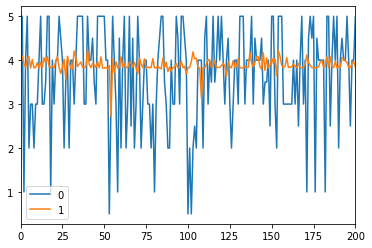

In [66]:
pred_df.plot(xlim=(0,200))